# Midterm project--Yiyun (Rona) Luo

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

/Users/rona/Downloads/STAT PROJECT


In [3]:
path = r'/Users/rona/Downloads/STAT PROJECT/amex-nyse-nasdaq-stock-histories/fh_20190420/full_history'
all_files = glob.glob(path + '/*.csv')
list_df = [pd.read_csv(f, index_col=0, usecols=['date','volume','adjclose']) for f in all_files]


In [4]:
for i in range(len(list_df)):
    list_df[i]=list_df[i].sort_index()

In [5]:
filename=[]
dirs= os.listdir(path)
for file in dirs:
     filename.append(file.replace('.csv',''))

In [6]:
for i in range(len(list_df)):
    list_df[i].columns=[filename[i]+'_volume',filename[i]+'_adjclose']    
    
#dfs = {'f'+str(i+1) : pd.read_csv(f) for i,f in enumerate(list_of_files)}

In [7]:
list_df_10yr=[]
for i in range(len(list_df)):
    if len(list_df[i].loc['2009-04-16':'2019-04-18'])==2520:
        list_df_10yr.append(list_df[i].loc['2009-04-16':'2019-04-18']) 

In [8]:
list_v_10=[]
for i in range(len(list_df_10yr)):
    if sum(list_df_10yr[i][list_df_10yr[i].columns[0]]<1000)/2520 <=0.05: #no more than 5% of volume less than 1000
        list_v_10.append(list_df_10yr[i])
        

In [9]:
print(len(list_df_10yr),len(list_v_10))

3787 3205


In [10]:
#less then 5% missing value in price
#missing_values = ['n/a','na','','NA','N/A']
list_m_10yr=[]
for j in range(len(list_v_10)):
    if (sum(list_v_10[j][list_v_10[j].columns[1]]==0)+ 
        sum(list_v_10[j][list_v_10[j].columns[1]].isnull()))/2520<0.05:
        list_m_10yr.append(list_v_10[j])

In [11]:
len(list_m_10yr)

3205

In [12]:
clean_list= list_m_10yr.copy()
import re

In [13]:
all_df = pd.concat(list_m_10yr, axis=1, join='inner')
print(all_df.shape)
print(all_df.isnull().sum().sum())


(2520, 6410)
0


In [15]:
price_df= all_df[all_df.columns.drop(list(all_df.filter(regex='volume')))]
print(price_df.shape)


(2520, 3205)


In [16]:
price_df.head(3)


,CSCO_adjclose,BIOS_adjclose,NZF_adjclose,UNT_adjclose,GPL_adjclose,SBGI_adjclose,UFCS_adjclose,BNY_adjclose,PPA_adjclose,ISSC_adjclose,...,SPTL_adjclose,LAC_adjclose,BLK_adjclose,BMO_adjclose,NXC_adjclose,SPXX_adjclose,PPL_adjclose,BWEN_adjclose,TIVO_adjclose,KEM_adjclose
date,,,,,,,,,,,,,,,,,,,,,
2009-04-16,14.295314,2.49,6.303655,27.700001,0.38,0.801760,15.413058,6.772310,11.458401,3.979697,...,21.832855,2.65,104.945930,19.379614,7.507971,4.858509,16.423471,78.199997,17.364796,1.313218
2009-04-17,14.224154,2.58,6.373877,28.629999,0.36,0.831455,15.246078,6.828747,11.502608,3.979697,...,21.501213,2.70,104.423515,19.740692,7.532633,4.867745,16.575489,83.199997,17.408474,1.343064
2009-04-20,13.686498,2.52,6.363070,25.549999,0.37,0.809184,13.815851,6.935977,11.087065,3.847273,...,21.829132,2.75,94.950691,18.337828,7.557287,4.692247,16.530445,78.400002,16.779568,1.432602


In [31]:
#logre_df=np.log(price_df/price_df.shift())


In [17]:
import seaborn as sns
#clean_price_df['HYD_adjclose'].plot()


In [567]:
#len(price_df.index[price_df['CSCO_adjclose'].pct_change().abs().ge(0.5)])

In [18]:
def ts_clean(s):
    start_ts = s[s.notna()].index[0]
    end_ts = s[s.notna()].index[-1]
    s = s.loc[start_ts:end_ts]
    s = s.where(s.pct_change().abs().ge(0.5)==False,np.nan)
    s = s.interpolate()
    #s = s.fillna(0)
    return s

In [593]:
# price_df['ITRN_adjclose'].where(~(abs(price_df['ITRN_adjclose']) > (price_df['ITRN_adjclose'].rolling(center=False,window=5).mean() + (price_df['NZF_adjclose'].rolling(center=False,window=5,min_periods = 3).std() * 2))),np.nan)
# print(price_df['ITRN_adjclose'].interpolate(method='polynomial', order=4))

In [19]:
%%time
output = []
for series in price_df.columns:
    cleaned_series = ts_clean(price_df[series])
    output.append(cleaned_series)
    

CPU times: user 6.57 s, sys: 37.5 ms, total: 6.61 s
Wall time: 6.67 s


In [20]:
clean_price_df = pd.concat(output,ignore_index=False,keys=price_df.columns,axis=1)
#clean_price_df

In [21]:
c_logre_df=np.log(clean_price_df/clean_price_df.shift())


/Users/rona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


## compute mean return, volatility, sharpe ratio and beta 


In [22]:
#rolling window size = 21
rolling_m=[]
rolling_v=[]
for i in c_logre_df.columns:
    mean_ro = c_logre_df[i].rolling(21).mean().shift() 
    std_ro = c_logre_df[i].rolling(21).std(ddof = 0).shift()
    #logre[i].pct_change.rolling(21).std().shift()
    #pd.rolling_std(logre[i],window=21) * np.sqrt(21)
    rolling_m.append(mean_ro)
    rolling_v.append(std_ro)

rolling_m1 = pd.concat(rolling_m,ignore_index=False,keys=c_logre_df.columns,axis=1)
rolling_v1 = pd.concat(rolling_v,ignore_index=False,keys=c_logre_df.columns,axis=1)


In [23]:
sr=rolling_m1/rolling_v1

In [24]:
#assets selection
# h=5
# m=21
# T=2520
# num_w=int((T-m)/h)
picksharp=[]
for i in range(22,sr.shape[0],5):
    picksharp.append(sr.iloc[i,:].sort_values(ascending=False)[:30].index)

In [183]:
len(picksharp)

500

In [32]:
opt_return=[]
opt_weight=[]

for num_w in range(len(picksharp)):
    daily_return=c_logre_df[picksharp[num_w]].iloc[int(num_w*h):int(m+num_w*h)]
    w_return = daily_return.mean()*5
    w_cov= daily_return.cov()*5

    port_returns = []
    port_volatility = []
    stock_weights = []
    sharpe_ratio = []

    num_assets=30
    num_portfolios = 20000 
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, w_return)
        volatility = np.sqrt(np.dot(weights.T, np.dot(w_cov, weights)))
        sharp = returns / volatility
        stock_weights.append(weights)
        port_returns.append(returns)
        port_volatility.append(volatility)
        sharpe_ratio.append(sharp)
    opt_weight.append(stock_weights[sharpe_ratio.index(max(sharpe_ratio))])
    opt_return.append(port_returns[sharpe_ratio.index(max(sharpe_ratio))])
    

In [36]:
cumulative=[]
for i in range(len(opt_return)):
    cumulative.append(sum(opt_return[0:i+1]))

In [37]:
opt_cu_df= pd.DataFrame(cumulative)
opt_cu_df.columns = ['cumu_re_opt']

## equally weighted

In [26]:
h=5
m=21
weight_eq=np.repeat(1.0/30.0,30)
eq_return=[]
eq_volatility=[]
eq_sharp_ratio=[]
for num_w in range(len(picksharp)):
    daily_return=c_logre_df[picksharp[num_w]].iloc[int(num_w*h):int(m+num_w*h)]
    w_return_eq = daily_return.mean()*5
    w_cov_eq= daily_return.cov()*5
    returns_eq = np.dot(weight_eq, w_return_eq)
    volatility_eq = np.sqrt(np.dot(weight_eq.T, np.dot(w_cov_eq, weight_eq)))
    sharp_eq = returns_eq / volatility_eq
    eq_return.append(returns_eq)
    eq_volatility.append(volatility_eq)
    eq_sharp_ratio.append(sharp_eq)

In [27]:
eq_return=pd.DataFrame(eq_return)
eq_return.columns=['eq_return']
eq_return['cusum']=eq_return.eq_return.cumsum(axis = 0)

In [41]:
SP500 = pd.read_csv("SP500new.csv", usecols=['Date','Close'],index_col=0) 
SP500_10 = SP500.loc['2009-04-16':'2019-04-18']

In [42]:
SP500_logre=np.log(SP500_10/SP500_10.shift())

In [49]:
SP500_logre_rw = SP500_logre.rolling(21).mean().shift() 
plot_SP500_logre_rw=SP500_logre_rw.iloc[22::5,]*5
cumulative_SP500=[]
for i in range(len(plot_SP500_logre_rw)):
    cumulative_SP500.append(sum(plot_SP500_logre_rw.Close.iloc[0:i+1]))

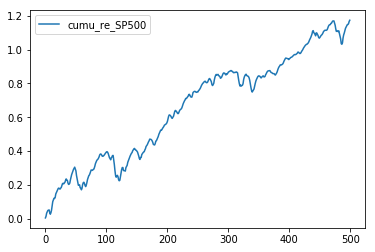

In [50]:
SP500_cu_df= pd.DataFrame(cumulative_SP500)
SP500_cu_df.columns = ['cumu_re_SP500']
SP500_cu_df.plot()

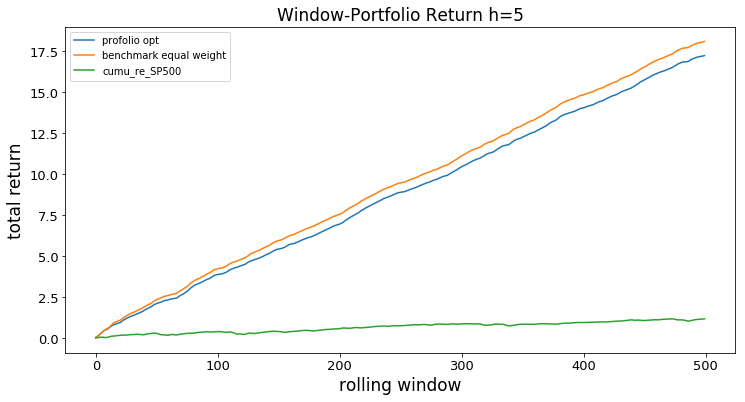

In [54]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
ax = fig.add_subplot(1, 1, 1)
opt_cu_df.cumu_re_opt.plot(ax=ax,label='profolio opt')
eq_return['cusum'].plot(ax=ax,label='benchmark equal weight')
SP500_cu_df.plot(ax=ax,label='SP500')
ax.legend()
ax.set_xlabel('rolling window',size=17)
ax.set_ylabel('total return',size=17)
ax.set_title('Window-Portfolio Return h=5',size=17)
ax.tick_params(axis="both", labelsize=13)
plt.show()

# 6

In [87]:
#mean return of windows portfolio, equal weight and SP500
mean_return_opt=opt_cu_df.iloc[-1]/len(picksharp)
mean_return_eq=eq_return.cusum.iloc[-1]/len(picksharp)
mean_return_SP500=SP500_cu_df.iloc[-1]//len(picksharp)

In [92]:
print(mean_return_opt)

cumu_re_opt    0.034455
Name: 499, dtype: float64
0.03617433065053993
cumu_re_SP500    0.0
Name: 499, dtype: float64


In [94]:
print(mean_return_eq)

0.03617433065053993


In [93]:
print(mean_return_SP500)

cumu_re_SP500    0.0
Name: 499, dtype: float64


In [88]:
#Volatility
vol_opt=np.std(opt_return)
vol_eq=np.std(eq_return.eq_return)
vol_SP500=np.std(plot_SP500_logre_rw)

In [96]:
print(vol_opt)

0.01279577114649222


In [97]:
print(vol_eq)

0.012424944116769442


In [98]:
print(vol_SP500)

Close    0.008929
dtype: float64


In [103]:
#sharp ratio
sr_opt=mean_return_opt/np.std(opt_return)
sr_eq=mean_return_eq/np.std(eq_return.eq_return)

In [100]:
print(sr_opt)

cumu_re_opt    2.692689
Name: 499, dtype: float64


In [101]:
print(sr_eq)

2.9114280362610976


In [137]:
#Sortino Ratio

#MAR(MINIMUM ACCEPTABLE RETURN)
mar = 0.5

def SortinoRatio(returns):
    rf = 0
    target = 0.5
    
    expected_return = returns.mean()
    down_stdev = np.sqrt(np.abs(returns[returns<0]))
    sortino_ratio = (expected_return - rf)/down_stdev
    return sortino_ratio

In [138]:
sorr_opt=SortinoRatio(np.array(opt_return))
sorr_eq=SortinoRatio(np.array(eq_return.eq_return))
sorr_SP500=SortinoRatio(np.array(plot_SP500_logre_rw))

In [76]:
# Maximum Drawdown
def maxdrawdown(cum_return):
    xs = cum_return
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    return i,j

In [86]:
md_opt=maxdrawdown(np.array(opt_return))
md_eq=maxdrawdown(np.array(eq_return.eq_return))
md_SP500=maxdrawdown(np.array(plot_SP500_logre_rw))

## try to pick same stocks for a period of time

In [123]:
flat_list = [item for sublist in picksharp for item in sublist]

In [124]:
from collections import Counter
import operator
stockpick = dict(Counter(flat_list))
sorted_stockpick=sorted(stockpick.items(), key=operator.itemgetter(1),reverse=True)
# sorted_stockpick[:30]

In [125]:
stockpick_nam=[]
for i in range(30):
    stockpick_nam.append(sorted_stockpick[i][0])

In [126]:
# pick the rolling mean we need for the prediction segment
rolling_estimate_pick=clean_price_df[stockpick_nam].rolling(21).mean()[21::5]

In [127]:
#replicate the rolling picked in previous step
newrolling_estimate_pick = pd.DataFrame(np.repeat(rolling_estimate_pick.values,5,axis=0))
newrolling_estimate_pick.columns = rolling_estimate_pick.columns
newrolling_estimate_pick=newrolling_estimate_pick.iloc[:-1]
newrolling_estimate_pick.index=clean_price_df.index[21:]

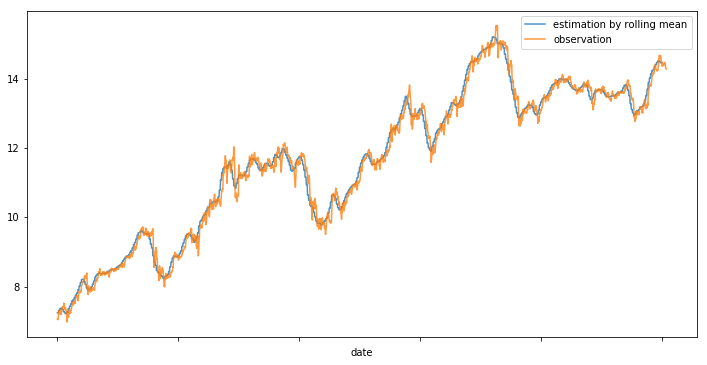

In [134]:
#comparison between observation and rolling-mean estimation
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
ax = fig.add_subplot(1, 1, 1)
newrolling_estimate_pick['IIM_adjclose'].plot(kind='line',ax=ax,label='estimation by rolling mean',alpha=0.8)
clean_price_df['IIM_adjclose'].plot(ax=ax,label='observation',alpha=0.8)

ax.legend()
plt.show()

In [136]:
# citation:
## https://plot.ly/ipython-notebooks/markowitz-portfolio-optimization/
## https://davistownsend.github.io/blog/Parallel_ts_fc_Dask/

In [135]:
#END